In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
#Get the last element for the date
for row in session.query(Measurement.date).all():
    last_element = row[-1]
print(last_element)

2017-08-23


In [11]:
#Getting column names
first_row = session.query(Measurement).limit(10).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x15bdbbd10>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0}

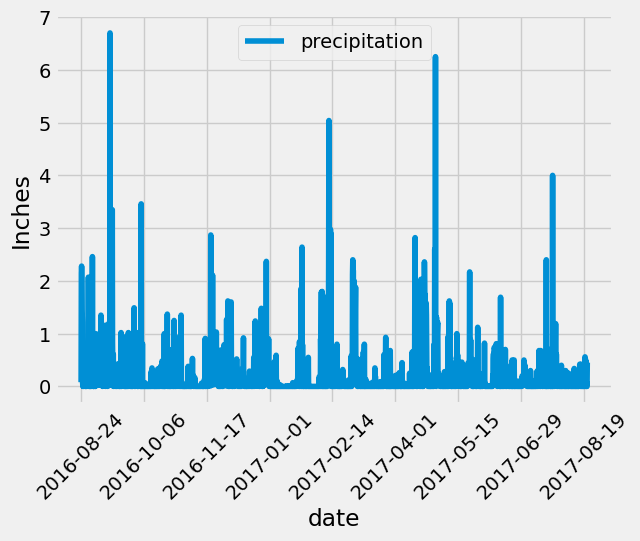

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >="2016-08-24").filter(Measurement.date <= "2017-08-23").all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_data_df = pd.DataFrame(prcp_data).set_index('date')
# Rename the column

prcp_data_df = prcp_data_df.rename(columns={'prcp': 'precipitation'})
# Sort the dataframe by date
prcp_data_df = prcp_data_df.sort_values(by='date').dropna()
prcp_data_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_data_df.plot(rot=45)
plt.savefig("Precipitation Analysis.png")
plt.ylabel('Inches')
plt.show()


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_data_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
Total_Station = session.query(Station).count()
Total_Station

9

In [15]:
#Getting the columns 
first_row = session.query(Station).limit(10).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x15c022570>,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'id': 1}

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Active_Stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Active_Stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()[0]

lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
avg__temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()

print(f"{lowest_temp}, {highest_temp}, {avg__temp}")



54.0, 85.0, 71.66378066378067


<Axes: ylabel='Frequency'>

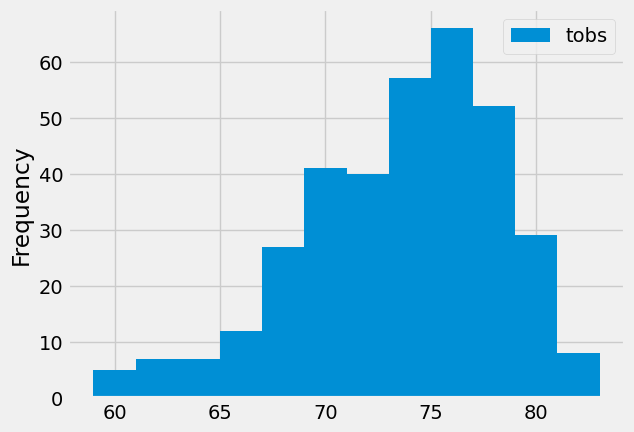

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plot  = session.query(Measurement.date, Measurement.tobs).\
                      filter(Measurement.date >= "2016-08-24").\
                      filter(Measurement.date <= "2017-08-23").\
                      filter(Measurement.station == most_active_station).all()

plot_df = pd.DataFrame(plot)

plot_df.plot.hist(bins=12)

# Close Session

In [19]:
# Close Session
session.close()